Importing the Dependencies

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Data

In [24]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [25]:
type(X_train)

numpy.ndarray

In [26]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images


Test Data = 10,000 Images



Image Dimension = 28 x 28

Grayscale Image = 1 channel ( unlike RGB which has 3 channels)

In [27]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [28]:
print(X_train[10].shape)

(28, 28)


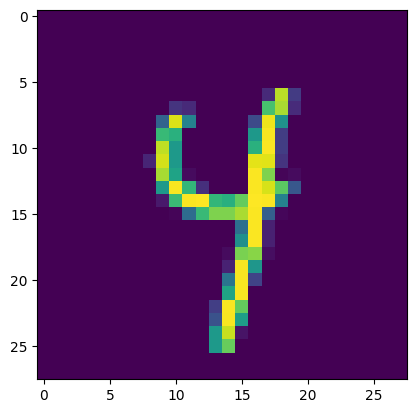

4


In [29]:
# displaying the Image

plt.imshow(X_train[26])
plt.show()

# print the corresponding label
print(Y_train[26])

Image Label

In [30]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [31]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this label as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset , If not, we have to resize all the images to a common dimension

In [32]:
# Scaling the Values
X_train = X_train/255
X_test = X_test/255


In [33]:
# printing the 10th image
print(X_train[10])



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [34]:
#setting up the layers for a neural network

model = keras.Sequential([

                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(50, activation='relu'),
                           keras.layers.Dense(50, activation='relu'),
                           keras.layers.Dense(10, activation='sigmoid')
])

In [41]:
# Compiling the neural Network

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.3033 - accuracy: 0.9122
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1430 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1055 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0703 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0602 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0520 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03

Training data accuracy is 98.8 %

**Acuuracy on test data**

In [43]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1029 - accuracy: 0.9728


In [45]:
print(accuracy)

0.9913833141326904


Test data accuracy is 99.14%

In [46]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

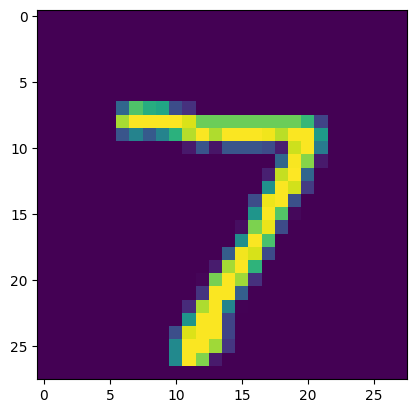

In [47]:
#  first datapoint in X_test
plt.imshow(X_test[0])
plt.show

In [48]:
print(Y_test[0])

7


In [49]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [50]:
print(Y_pred.shape)

(10000, 10)


In [51]:
print(Y_pred[0])    #each value show probability of each lable here.

[4.2193471e-03 2.1645674e-04 2.4129534e-01 6.8562996e-01 1.8359921e-07
 3.6680855e-02 1.1966056e-08 9.9999177e-01 9.0444379e-04 1.8052056e-01]


model.predict() gives the prediction probability of each class for the particular datapoint


In [53]:
# converting the prediction probabilities to class lables

label_for_first_test_image = np.argmax(Y_pred[0])

In [54]:
print(label_for_first_test_image)

7


In [56]:
# converting the pediction probabilities to the class label
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [57]:
print(Y_pred)

[[4.2193471e-03 2.1645674e-04 2.4129534e-01 ... 9.9999177e-01
  9.0444379e-04 1.8052056e-01]
 [1.2056259e-04 9.2570579e-01 9.9999887e-01 ... 1.2594091e-06
  1.2501115e-02 3.3689266e-06]
 [6.4972883e-05 9.9902683e-01 6.1570969e-03 ... 1.7845456e-01
  5.0880920e-02 2.4085443e-03]
 ...
 [1.2999632e-07 1.7610253e-04 1.3907335e-09 ... 7.9664923e-02
  3.0486521e-04 3.3611014e-01]
 [4.1752500e-08 3.5716310e-01 1.1094329e-04 ... 2.9185727e-02
  9.1874915e-01 2.2718782e-04]
 [9.8771459e-01 2.3046634e-06 6.5140543e-04 ... 3.0369915e-07
  2.0508470e-03 1.7432561e-05]]


Y_test -- True Labels

Y_pred_labels -- Predicted Labels


**Confusion Matrix**

In [58]:
conf_mat= confusion_matrix(Y_test, Y_pred_labels)

In [59]:
print(conf_mat)

tf.Tensor(
[[ 954    0    1    2    2    8    8    1    3    1]
 [   0 1128    4    0    0    1    1    0    1    0]
 [   2    5  993   11    4    2    2    7    5    1]
 [   2    3    2  983    0    9    0    4    5    2]
 [   1    1    0    0  968    2    4    2    1    3]
 [   1    1    0   12    1  866    3    0    5    3]
 [   1    2    0    1    4    6  943    0    1    0]
 [   1    9   11    1    2    1    0  994    3    6]
 [   2    0    2    6    7   12    1    4  935    5]
 [   2    3    0    5   16    9    0    6    5  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

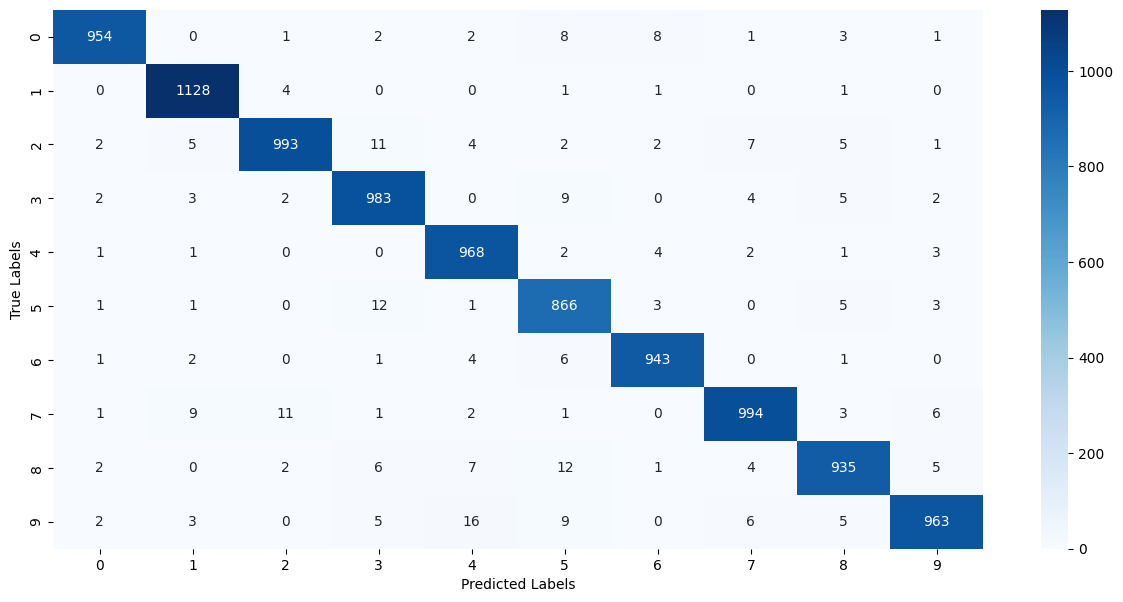

In [64]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive system

In [91]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [66]:
type(input_image)

numpy.ndarray

In [68]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


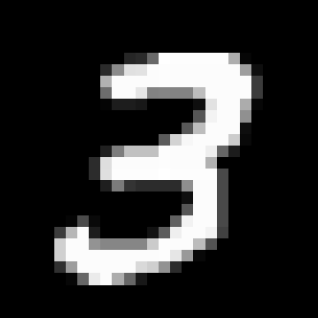

In [69]:
cv2_imshow(input_image)

In [70]:
input_image.shape

(318, 318, 3)

In [71]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)  #this is basically  a color conversion

In [72]:
grayscale.shape

(318, 318)

In [73]:
#resizing the image from 318 x 318 to 28 x 28
input_image_resize = cv2.resize(grayscale,(28, 28))

input_image_resize.shape

(28, 28)

In [74]:
cv2_imshow(input_image_resize)

In [75]:
input_image_resize = input_image_resize/255

In [79]:
type(input_image_resize)

numpy.ndarray

In [80]:
image_reshape = np.reshape(input_image_resize,[1, 28, 28])

In [82]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 47ms/step
[[2.3649156e-08 6.8286440e-06 7.1363244e-04 1.0000000e+00 2.9672456e-13
  1.4151183e-01 1.0379010e-16 8.4129795e-08 6.1095411e-01 9.2783916e-01]]


In [83]:
input_pred_label = np.argmax(input_prediction)

In [90]:
print(input_pred_label)

1


**Predictive** **System**

Path of the image is to be predicted:/content/MNIST_digit.png


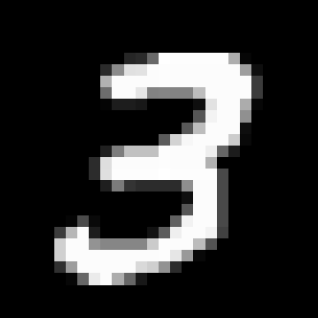

1/1 [==============================] - 0s 37ms/step
The handwritten digit is recognized as [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [92]:
input_image_path =  input('Path of the image is to be predicted:')

input_image_path = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1, 28, 28])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognized as', input_image)